# Coursework
# SPCE0038: Machine Learning with Big-Data

---

## Overview

This coursework is provided as a Jupyter notebook, which you will need to complete.  

Throughout the notebook you will need to complete code, analytic exercises (if equations are required please typeset your solutions using latex in the markdown cell provided) and descriptive answers. Much of the grading of the coursework will be performed automatically, so it is critical you name your variables as requested.

Before you turn this coursework in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says "YOUR ANSWER HERE" or `YOUR CODE HERE` and remove remove the `raise NotImplementedError()` exceptions that are thrown before you have added your answers. Do not add and remove cells but rather provide your answers in the spaces given.

Please also:
- Make sure your notebook executes without errors.
- Do not overwrite or rename any existing variables.
- Do not install code or packages in the notebooks.

Please rename the notebook filename to include your name in the filename.  And please also add your name below:

In [1]:
NAME = "Mubarak Youssouf"

You will be able to run some basic tests in the notebook to check the basic operation of your code is as expected.  Although do not assume your responses are complete or fully correct just because the basic tests pass.

Once you have renamed the notebook file and completed the exercises, please upload the notebook to Moodle.


---

## AstroML

The data used is this coursework is obtained using [AstroML](http://www.astroml.org), a python package for machine learning for astronomy.  Although we take data from AstroML, this coursework is not based on standard AstroML examples.  So you will *not* find the solutions in AstroML examples!

## SDSS

The data obtained through AstroML was observed by the [Sloan Digital Sky Survey](https://www.sdss.org/) (SDSS), which began observations in 2000.  SDSS data have lead to many scientific advances and the experiment is widely seen as one of the most successful surveys in the history of astronomy.

---

## Dependencies

- Standard course dependencies (e.g. numpy, scikit-learn, etc.)
- [AstoML](http://www.astroml.org)
- [AstroPy](http://www.astropy.org/)

---

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def check_var_defined(var):
    try:
        exec(var)
    except NameError:
        raise NameError(var + " not defined.")
    else:
        print(var + " defined.")

## Part 1: Regression

In these exercises we will consider the regression problem of the astonomical distance modulus vs redshift relationship.

In astronomy, the [distance modulus](https://en.wikipedia.org/wiki/Distance_modulus) specifies the difference between the apparent and absolute magnitudes of an astronomnical object.  It provides a way of expressing astrophysical distances. 

Astronomical [redshift](https://en.wikipedia.org/wiki/Redshift) specifies the shift in wavelength that astronomical objects undergo due to the expansion of the Universe.  Due to Hubble's Law, more distance objects experience a greater redshift.


In [4]:
from astroML.datasets import generate_mu_z

In [5]:
# Load data
m = 150
z_sample, mu_sample, dmu = generate_mu_z(m, random_state=3)

Plot the distance modulus ($\mu$) vs redhift ($z$), including error bars.

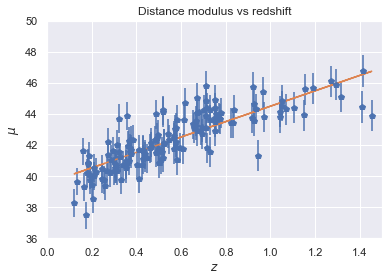

In [145]:
# Plot data
from sklearn.linear_model import LinearRegression

def plot_dist_mod():
    
    plt.errorbar(z_sample, mu_sample, fmt='p', yerr=dmu)

    model = LinearRegression()
    model.fit(z_sample.reshape(len(z_sample),1), mu_sample)
    predicted_mu = model.predict(z_sample.reshape(len(z_sample),1))
    plt.plot(z_sample, predicted_mu)
    plt.xlabel('$z$')
    plt.ylabel('$\mu$')
    plt.title('Distance modulus vs redshift')
    plt.ylim(36, 50)
    plt.xlim(0, 1.5)
plot_dist_mod()

#The x axis will range from 0 to 1.4
#The y axis will range from 36 to 50

 #raise NotImplementedError()

Recall the normal equations for linear regression follow by analytically minimising the cost function: 

$$\min_\theta\ C(\theta) = \min_\theta \ (X \theta - y)^{\rm T}(X \theta - y).$$

Show analytically that the solution is given by 

$$ \hat{\theta} = \left( X^{\rm T} X \right)^{-1} X^{\rm T} y. $$

[Matrix calculus identities](https://en.wikipedia.org/wiki/Matrix_calculus) may be useful (note that we use the denominator layout convention).

Expand the cost function and drop terms that do not depend on $\theta$ (use latex mathematics expressions):

$$C(\theta) = (X\theta-y)^T(X\theta-y) = \theta^TX^TX\theta -\theta^TX^Ty - y^TX\theta - y^Ty $$

The $-y^Ty$ expression does not depend on $\theta$, so we can drop this term. So we are now left with:

$$ \theta^TX^TX\theta -\theta^TX^Ty - y^TX\theta $$

Set the derivative to zero and solve for $\theta$ (use latex mathematics expressions):

$$ \frac{dC(\theta)}{\theta} = 2(X^T\theta_{min} - X^Ty) = 0$$

$$\therefore X^TX_{min} = X^Ty$$

$$ \therefore \theta_{min} = (X^TX)^{-1}X^Ty $$


Solve for $\theta$ by numerically implementing the analytic solution given above.

In [7]:
def compute_theta_lin_reg(X, y):
    # YOUR CODE HERE
    X_b = np.c_[np.ones((m, 1)), X] 
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    theta   
    return theta

In [8]:
assert compute_theta_lin_reg(z_sample, mu_sample).shape == (2,)
theta = compute_theta_lin_reg(z_sample, mu_sample)
(theta_c, theta_m) = theta
print("Linear regression parameters recovered analytically: intercept={0:.4f}, slope={1:.4f}".format(theta_c, theta_m))

Linear regression parameters recovered analytically: intercept=39.5505, slope=4.9538


In [9]:
check_var_defined('theta_c')
check_var_defined('theta_m')

theta_c defined.
theta_m defined.


Write a method to make a prediction for a given redshift.

In [10]:
def predict_lin_reg(theta, x):
#     YOUR CODE HERE
    X_new_b = np.c_[np.ones((len(x), 1)), x]
    y = X_new_b.dot(theta)
    return y

Predict the distance modulus for a range of redshift values between 0.01 and 1.5 and plot the predicted curve overlayed on data (make a new plot; do not revise the plot above).  Call the variable used to store the predictions for your polynomial model `mu_pred_lin`.

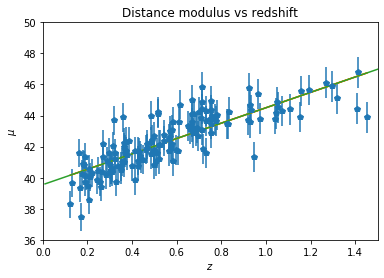

In [11]:
z = np.linspace(0.01, 1.5, 1000)
plot_dist_mod()
# YOUR CODE HERE
mu_pred_lin = predict_lin_reg(theta, z)
plt.plot(z,mu_pred_lin)

In [12]:
check_var_defined('mu_pred_lin')
assert mu_pred_lin.shape == (len(z),)

mu_pred_lin defined.


Solve for the parameters $\theta$ using Scikit-Learn.

In [13]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
Z_sample = z_sample.reshape(-1,1)
lin_reg.fit(Z_sample,mu_sample)
#raise NotImplementedError()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print("Linear regression parameters recovered by scikit-learn: intercept={0:.4f}, slope={1:.4f}"
      .format(lin_reg.intercept_, lin_reg.coef_[0]))

Linear regression parameters recovered by scikit-learn: intercept=39.5505, slope=4.9538


Extend your model to include polynomial features up to degree 15 (using Scikit-Learn).  Use variable `lin_reg_poly` for your revised model.

In [15]:
degree = 15
bias = False
from sklearn.preprocessing import PolynomialFeatures
def compute_poly_features(degree, bias):
    
    lin_reg_poly = LinearRegression()
    poly_features = PolynomialFeatures(degree=degree,include_bias=bias)
    z_sample_poly = poly_features.fit_transform(z_sample.reshape((-1,1)))
    return z_sample_poly, poly_features
    
z_sample_poly, poly_features = compute_poly_features(degree, bias)

lin_reg_poly = LinearRegression()
lin_reg_poly = lin_reg_poly.fit(z_sample_poly, mu_sample) 
#raise NotImplementedError()

In [16]:
check_var_defined('lin_reg_poly')

lin_reg_poly defined.


Plot the data and the predictions of your models considered so far (linear and polynomial regression).  Call the variable used to store the predictions for your polynomial model `mu_pred_poly`.

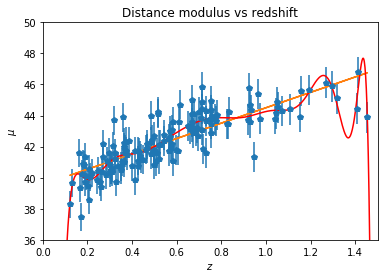

In [17]:
# YOUR CODE HERE
plot_dist_mod()
z_new = poly_features.transform(z.reshape((-1,1)))
mu_pred_poly = lin_reg_poly.predict(z_new)
plt.plot(z,mu_pred_poly, 'r')
                                
mu_pred_poly = lin_reg_poly.predict(z_new)                                
#raise NotImplementedError()

In [18]:
check_var_defined('mu_pred_poly')
assert mu_pred_poly.shape == (len(z),)

mu_pred_poly defined.


Comment on the accuracy of your models.

The regression line in my model appears to be overfitted. The model contains more parameters than can be justified for the data, hence it may therefore struggle to fit additional data or predict future observations reliably.

Improve your polynomial model and use the improved model to make predictions.  Call the variable used to store the predictions for your polynomial model `mu_pred_poly_improved`.

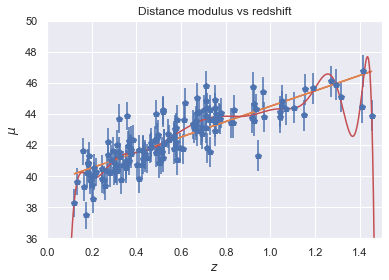

In [147]:
degree = 2
bias = False
from sklearn.preprocessing import PolynomialFeatures
def compute_poly_features(degree, bias):
    
    lin_reg = LinearRegression()
    poly_features = PolynomialFeatures(degree=degree,include_bias=bias)
    z_sample_poly = poly_features.fit_transform(z_sample.reshape((-1,1)))
    return z_sample_poly, poly_features
    
z_sample_poly, poly_features_improved = compute_poly_features(degree, bias)
lin_reg_poly_improved = LinearRegression()
lin_reg_poly_improved = lin_reg_poly_improved.fit(z_sample_poly, mu_sample)
plot_dist_mod()
z_new = poly_features_improved.transform(z.reshape((-1,1)))
mu_pred_poly_improved = lin_reg_poly_improved.predict(z_new)
plt.plot(z,mu_pred_poly, 'r')    

In [20]:
check_var_defined('mu_pred_poly_improved')
assert mu_pred_poly_improved.shape == (len(z),)

mu_pred_poly_improved defined.


Plot the predictions made with new model and all previous models considered.

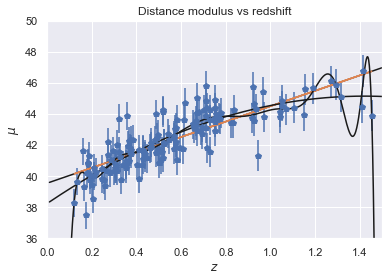

In [148]:
# YOUR CODE HERE
plt.plot(z,mu_pred_lin, 'k')
plot_dist_mod()
plt.plot(z,mu_pred_poly, 'k')
plt.plot(z,mu_pred_poly_improved, 'k')
#raise NotImplementedError()

Compute the RMS error between your predictions and the *data samples*.

In [149]:
# Define a general function to compute the RMS error
from sklearn.metrics import mean_squared_error
def compute_rms(mu_1, mu_2):
    return np.sqrt(mean_squared_error(mu_1, mu_2))
# raise NotImplementedError()

In [23]:
assert np.isclose(compute_rms(mu_pred_lin, mu_pred_lin), 0.0)

In [24]:
# Compute the RMS error between the data and the predictions for each model.
# Use variables rms_sample_lin, rms_sample_poly and rms_sample_poly_improved.
rms_sample_lin = compute_rms(mu_sample, lin_reg.predict(z_sample.reshape((len(z_sample),1))))

z_p = poly_features.transform(z_sample.reshape((len(z_sample),1)))
rms_sample_poly = compute_rms(mu_sample, lin_reg_poly.predict(z_p))

z_p_imp = poly_features_improved.transform(z_sample.reshape((len(z_sample),1)))
rms_sample_poly_improved = compute_rms(mu_sample, lin_reg_poly_improved.predict(z_p_imp))
#raise NotImplementedError()

In [25]:
# Print RMS values computed.
print("rms_sample_lin = {0:.4f}".format(rms_sample_lin))
print("rms_sample_poly = {0:.4f}".format(rms_sample_poly))
print("rms_sample_poly_improved = {0:.4f}".format(rms_sample_poly_improved))

rms_sample_lin = 1.0084
rms_sample_poly = 0.8855
rms_sample_poly_improved = 0.9331


In [26]:
check_var_defined('rms_sample_lin')

rms_sample_lin defined.


In [27]:
check_var_defined('rms_sample_poly')

rms_sample_poly defined.


In [28]:
check_var_defined('rms_sample_poly_improved')

rms_sample_poly_improved defined.


Comment on what models you believe are best.

rms_sample_poly is arguably the best model as it has the lowest rms value (in regards to magnitude). However the plot associated with this appears to be overfitted. rms_poly_improved appears to be fitted relatively well. Overall I believe that rms_poly_improved is the best model. 

Using our cosmological concordance model we can predict the theoretical distance modulus vs redshift relationship using our understanding of the physics.

In [29]:
from astroML.cosmology import Cosmology
cosmo = Cosmology()
mu_cosmo = np.array(list(map(cosmo.mu, z)))

        Use astropy.cosmology instead. [warnings]


Plot the data, predictions made with all regression models, and the values predicted by the cosmological model.

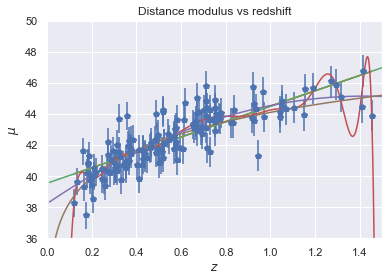

In [150]:
# YOUR CODE HERE
plot_dist_mod()
plt.plot(z,mu_pred_lin)
plt.plot(z,mu_pred_poly)
plt.plot(z,mu_pred_poly_improved)
plt.plot(z,mu_cosmo)
#raise NotImplementedError()

Compute the RMS error between the predictions made by the cosmological model and each of the regression models, over the sample array `z`.

In [31]:
# Compute the RMS error between the data and the predictions for each model.
# Use variables rms_cosmo_lin, rms_cosmo_poly and rms_cosmo_poly_improved.
# YOUR CODE HERE
rms_cosmo_lin = compute_rms(mu_cosmo, mu_pred_lin)

rms_cosmo_poly = compute_rms(mu_cosmo, mu_pred_poly)

rms_cosmo_poly_improved = compute_rms(mu_cosmo, mu_pred_poly_improved)

#raise NotImplementedError()

In [32]:
# Print RMS values computed.
print("rms_cosmo_lin = {0:.4f}".format(rms_cosmo_lin))
print("rms_cosmo_poly = {0:.4f}".format(rms_cosmo_poly))
print("rms_cosmo_poly_improved = {0:.4f}".format(rms_cosmo_poly_improved))

rms_cosmo_lin = 1.1252
rms_cosmo_poly = 20.6649
rms_cosmo_poly_improved = 0.6689


In [33]:
check_var_defined('rms_cosmo_lin')

rms_cosmo_lin defined.


In [34]:
check_var_defined('rms_cosmo_poly')

rms_cosmo_poly defined.


In [35]:
check_var_defined('rms_cosmo_poly_improved')

rms_cosmo_poly_improved defined.


Comment on the RMS values computed and the implications for the accuracy of the different regression models considered.

rms_cosmo_poly_improved arguablably appears to be the most accurate (and hence) the most ideal model.

---

## Part 2: Classification

In these exercises we will consider classification of [RR Lyrae](https://en.wikipedia.org/wiki/RR_Lyrae_variable) variable stars.  RR Lyrae variables are often used as standard candles to measure astronomical distances since their period of pulsation can be related to their absolute magnitude.

Observations of star magnitudes are made in each [SDSS filter band](http://skyserver.sdss.org/dr2/en/proj/advanced/color/sdssfilters.asp): u, g, r, i, z.

We will consider the space of astronomical "colours" to distinguish RR Lyraes from background stars.  Astronomical colours are simply differences in magnitudes between bands, e.g. u-g, g-r, r-i, i-z.  You can find further background [here](https://en.wikipedia.org/wiki/Color%E2%80%93color_diagram).

First, download the data.  (This may take some time on first execution.  Subsequently executions will read from cached data on your system.)

In [36]:
# Load data
from astroML.datasets import fetch_rrlyrae_combined
X, y = fetch_rrlyrae_combined()

You can learn more about the format of the returned data [here](http://www.astroml.org/modules/generated/astroML.datasets.fetch_rrlyrae_combined.html).  In particular, note that the columns of `X` are u-g, g-r, r-i, i-z.

Construct a Pandas DataFrame for the `X` data and a Series for the `y` data.  Call your Pandas objects `X_pd` and `y_pd` respectively.

Be sure to give your colums the correct colour name, e.g. 'u-g'.

In [151]:
import pandas as pd
cols=['u-g', 'g-r', 'r-i', 'i-z']
# YOUR CODE HERE
X_pd = pd.DataFrame(X,columns=cols)

In [152]:
check_var_defined('X_pd')
X_pd.head()

X_pd defined.


,u-g,g-r,r-i,i-z
0,1.250999,0.394000,0.137000,0.061999
1,1.048000,0.339001,0.151999,0.023001
2,1.008001,0.341999,0.129000,0.203001
3,0.965000,0.392000,0.149000,0.150000
4,1.040001,0.333000,0.125999,0.101999


In [56]:
y_pd = pd.Series(y)

In [57]:
check_var_defined('y_pd')
y_pd.head()

y_pd defined.


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64

Combine your data and targets into a single Pandas DataFrame, labelling the target column 'target'.  Call the resulting Pandas DataFrame `X_pd_all`.

In [58]:
X_pd_all = pd.concat([X_pd, y_pd], axis = 'columns')
X_pd_all.columns = ('u-g', 'g-r', 'r-i', 'i-z', 'target')
#raise NotImplementedError()

In [59]:
check_var_defined('X_pd_all')
X_pd_all.head()

X_pd_all defined.


,u-g,g-r,r-i,i-z,target
0,1.250999,0.394000,0.137000,0.061999,0.0
1,1.048000,0.339001,0.151999,0.023001,0.0
2,1.008001,0.341999,0.129000,0.203001,0.0
3,0.965000,0.392000,0.149000,0.150000,0.0
4,1.040001,0.333000,0.125999,0.101999,0.0


Add a 'target description' column to your existing `X_pd_all` DataFrame, with fields 'Background' and 'RR Lyrae' to specify the target type.

In [153]:
# YOUR CODE HERE
X_pd_all = X_pd_all.fillna(0)
X_pd_all['target description'] = np.where(X_pd_all['target']==0, 'background', 'RR Lyrae')
X_pd_all
#raise NotImplementedError()

,u-g,g-r,r-i,i-z,target,target description
0,1.250999,0.394000,0.137000,0.061999,0.0,background
1,1.048000,0.339001,0.151999,0.023001,0.0,background
2,1.008001,0.341999,0.129000,0.203001,0.0,background
3,0.965000,0.392000,0.149000,0.150000,0.0,background
4,1.040001,0.333000,0.125999,0.101999,0.0,background
...,...,...,...,...,...,...
93136,0.962999,0.059000,-0.025999,-0.025000,1.0,RR Lyrae
93137,1.059999,0.185001,0.050999,-0.023998,1.0,RR Lyrae
93138,1.044001,0.212000,0.035000,0.002001,1.0,RR Lyrae
93139,1.064999,0.172001,0.042000,0.003000,1.0,RR Lyrae


In [154]:
X_pd_all.head()
X_pd_all.tail()

,u-g,g-r,r-i,i-z,target,target description
93136,0.962999,0.059000,-0.025999,-0.025000,1.0,RR Lyrae
93137,1.059999,0.185001,0.050999,-0.023998,1.0,RR Lyrae
93138,1.044001,0.212000,0.035000,0.002001,1.0,RR Lyrae
93139,1.064999,0.172001,0.042000,0.003000,1.0,RR Lyrae
93140,1.125999,0.065001,-0.017000,-0.057999,1.0,RR Lyrae


How many RR Lyrae variable stars are there in the dataset (i.e compute `n_rrlyrae`)?

In [155]:
# YOUR CODE HERE
n_rrlyrae = X_pd_all['target description'].value_counts()['RR Lyrae']
#raise NotImplementedError()

In [156]:
check_var_defined('n_rrlyrae')
print("n_rrlyrae = {0}".format(n_rrlyrae))

n_rrlyrae defined.
n_rrlyrae = 483


How many background stars are there in the dataset (i.e. compute `n_background`)?

In [157]:
# YOUR CODE HERE
n_background = X_pd_all['target description'].value_counts()['background']
#raise NotImplementedError()

In [158]:
check_var_defined('n_background')
print("n_background = {0}".format(n_background))

n_background defined.
n_background = 92658


Plot scatter plot pairs for all colour combinations using `seaborn`.  Colour the points by target type.

In [66]:
%matplotlib inline
import seaborn as sns; sns.set()

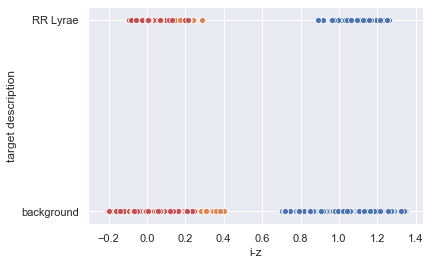

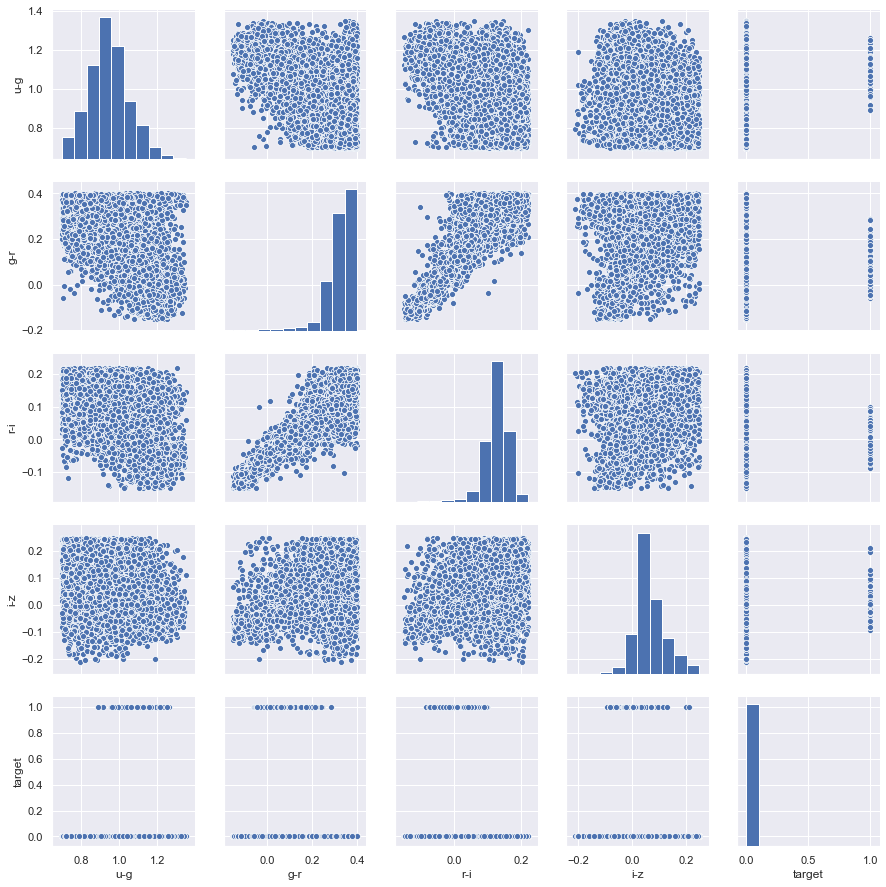

In [67]:
# YOUR CODE HERE
sns.scatterplot(x='u-g', y='target description', data=X_pd_all)
sns.scatterplot(x='g-r', y='target description', data=X_pd_all)
sns.scatterplot(x='r-i', y='target description', data=X_pd_all)
sns.scatterplot(x='i-z', y='target description', data=X_pd_all)
#raise NotImplementedError()
sns.pairplot(X_pd_all)

Let's separate the data into training and test sets, keeping 25% of the data for testing.  

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

First let's consider 1D classification for the zeroth colour, i.e. $u-g$. 

In [69]:
ind = 0
col=cols[ind]
col

'u-g'

In [71]:
X_train_1d = X_train[:, ind]
X_train_1d = X_train_1d.reshape(-1,1)
X_test_1d = X_test[:, ind]
X_test_1d = X_test_1d.reshape(-1,1)

To get some further intuition about the 1D classiciation problem consider a 1D plot of
class against colour.

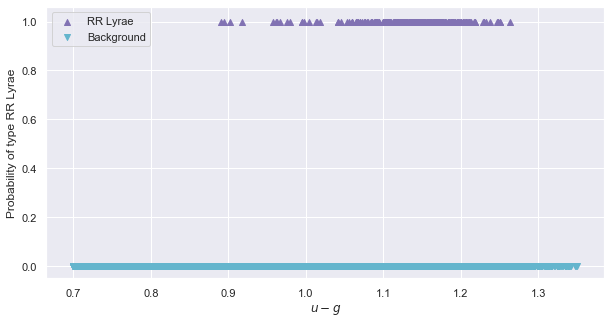

In [72]:
def plot_scatter():
    plt.figure(figsize=(10,5))
    plt.scatter(X_train_1d[y_train==1], y_train[y_train==1], c='m', marker='^', label='RR Lyrae')
    plt.scatter(X_train_1d[y_train==0], y_train[y_train==0], c='c', marker='v', label='Background')
    plt.xlabel('$' + col + '$')
    plt.ylabel('Probability of type RR Lyrae')
plot_scatter()    
plt.legend()

Given the plot shown above, comment on how well you expect logistic regression to perform.

YOUR ANSWER HERE

Where would you guess the decision bounary should lie?  Set the variable `decision_boundary_guess` to your guess.

In [73]:
# YOUR CODE HERE
decision_boundary_guess =1.3
# raise NotImplementedError()

In [74]:
check_var_defined('decision_boundary_guess')
print("decision_boundary_guess = {0:.4f}".format(decision_boundary_guess))

decision_boundary_guess defined.
decision_boundary_guess = 1.3000


Use Scikit-Learn to perform logistic regression to classify the two classes for this 1D problem.

First, set the inverse regularation strength `C` such that regularisation is effecitvely not performed.

In [75]:
C = 1e10

Second, fit the model using Scikit-Learn. Use the variable `clf` for your classification model.

In [76]:
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=C)
clf.fit(X_train_1d, y_train)
# raise NotImplementedError()

C:\Users\mubarik\Anaconda3\envs\MLBDenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
check_var_defined('clf')

clf defined.


Compute the decision boundary of the logistic regression model fitted by Scikit-Learn.  User variable `decision_boundary_sklearn` for your result.

(Ensure your result is a scalar and not an array of length 1.)

In [78]:
# YOUR CODE HERE
decision_boundary_sklearn = X_train_1d[y_train >= 0.5][0][0]
#raise NotImplementedError()

In [79]:
check_var_defined('decision_boundary_sklearn')
assert not hasattr(decision_boundary_sklearn, "__len__")
print("decision_boundary_sklearn = {0:.4f}".format(decision_boundary_sklearn))

decision_boundary_sklearn defined.
decision_boundary_sklearn = 1.1360


Evaluate the probabilities prediced by your logistic regression model over the domain specified by the variable `X_1d_new`. Use variable `y_1d_proba` for your computed probabilities.

In [80]:
X_1d_new = np.linspace(0.3, 2.0, 1000).reshape(-1, 1)
y_1d_proba = clf.predict_proba(X_1d_new)
#raise NotImplementedError()

In [81]:
check_var_defined('y_1d_proba')

y_1d_proba defined.


Plot the probability of a star being of type RR Lyrae against the colour variable considered.  Also plot the probability of being a Background star.  Overlay these plots on the scatter plot of class types.  Also plot the decision boundary that you guessed previously and the one computed by Scikit-Learn.

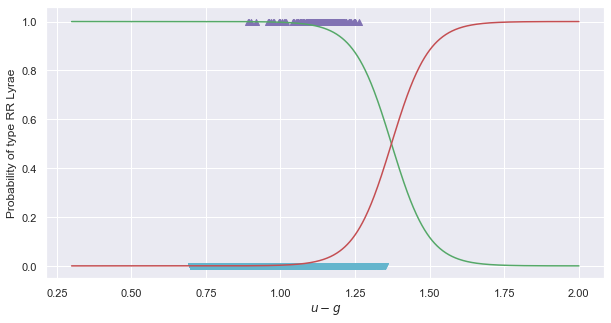

In [82]:
plot_scatter()
plt.plot(X_1d_new, y_1d_proba[:,0], 'g-',label = 'background')
plt.plot(X_1d_new, y_1d_proba[:,1], 'r-',label = 'RR Lyrae')
#raise NotImplementedError()

From inspection of your plot, how would all objects in the training set be classified?

It is imposible to predict the type of target.

Use your logistic regression model fitted by Scikit-Learn to predict the class of all objects in the test set. User variable `y_test_1d_pred` to specify your answer.

In [83]:
# YOUR CODE HERE
y_test_1d_pred = clf.predict(X_test_1d)
#raise NotImplementedError()

In [84]:
check_var_defined('y_test_1d_pred')

y_test_1d_pred defined.


How many objects are classified as of type RR Lyrae?  Use variable `n_rrlyrae_pred` to specify your answer.

In [85]:
# YOUR CODE HERE
n_rrlyrae_pred = sum(y_test_1d_pred)
#raise NotImplementedError()

In [86]:
check_var_defined('n_rrlyrae_pred')
assert n_rrlyrae_pred % 1 == 0 # check integer
print("n_rrlyrae_pred = {0}".format(n_rrlyrae_pred))

n_rrlyrae_pred defined.
n_rrlyrae_pred = 0.0


How many objects are classified as of type Background?  Use variable `n_background_pred` to specify your answer.

In [87]:
# YOUR CODE HERE
n_background_pred = X_test_1d.shape[0]-n_rrlyrae_pred
#raise NotImplementedError()

In [88]:
check_var_defined('n_background_pred')
assert n_background_pred % 1 == 0 # check integer
print("n_background_pred = {0}".format(n_background_pred))

n_background_pred defined.
n_background_pred = 23286.0


Let's check the Scikit-Learn result by solving the logistic regression problem (without regularisation) manually.

Recall that the cost function for logistic regression is given by
$$
C(\theta) = -\frac{1}{m} \sum_{i=1}^m 
\left [ 
y^{(i)} \log(\hat{p}^{(i)})
+
(1 - y^{(i)}) \log(1 - \hat{p}^{(i)})
\right],
$$


where

$$\hat{p} = \sigma(\theta^\text{T} x) = \frac{1}{1+\exp{(-\theta^\text{T} x)}}. $$

Show analytically that the derivative of the cost function is given by
$$\begin{eqnarray}
\frac{\partial C}{\partial \theta} 
&=& 
\frac{1}{m} \sum_{i=1}^m 
\left[ \sigma\left(\theta^{\rm T} x^{(i)} \right) - y^{(i)} \right]
x^{(i)}\\
&=&
\frac{1}{m} 
X^{\rm T}
\left[ \sigma\left(X \theta \right) - y \right]
\end{eqnarray}$$

(use latex mathematics expressions).

First, simplify the cost function terms $\log(\hat{p})$ and $\log(1-\hat{p})$ to express in terms linear in $\log\left({1+{\rm e}^{-\theta^{\rm T}x}}\right)$.

(You may drop $i$ superscripts for notational brevity.)

$$\frac{\partial C}{\partial \theta} = -\frac{1}{m}\frac{\partial }{\partial \theta}y\log\sigma (\theta^Tx)+\frac{\partial}{\partial \theta}(1-y)\log(1-\sigma(\theta^Tx))$$

Next, substitute these terms into the cost function and simplify to also express the cost function in terms linear in $\log\left({1+{\rm e}^{-\theta^{\rm T}x}}\right)$.

$$  \frac{\partial C}{\partial \theta} = -\frac{1}{m} \Bigg(\frac{y}{\sigma(\theta^Tx)}-\frac{1-y}{1-\sigma(\theta^Tx)}\Bigg)\frac{\partial }{\partial \theta}\sigma(\theta^Tx)$$

Now compute the derivative of the cost function with respect to variable $\theta_j$, i.e. compute $\partial C / \partial \theta_j$.

$$\frac{\partial C}{\partial \theta}=-\frac{1}{m}\frac{y-\sigma(\theta^Tx)}{\sigma(\theta^Tx)(1-\sigma(\theta^Tx)}\sigma(\theta^Tx)(1-\sigma(\theta^Tx))X$$

Combine terms for all $\theta_j$ to give the overall derivative with respect to $\theta$, i.e. $\partial C / \partial \theta$.

$$\frac{\partial C}{\partial \theta}=\frac{1}{m}(\sigma (\theta X)-y)X^T$$

Using the analytically expression for the derivative of the cost function, we will solve the logistic regression problem by implementing a gradient descent algorithm.

First, define the sigmoid function.

In [89]:
def sigmoid(x):
    # YOUR CODE HERE
    return 1/(np.exp(-x)+1)
# raise NotImplementedError()

In [90]:
assert np.isclose(sigmoid(0), 0.5)

Next, extend the training data to account for a bias term in your model. Use variable `X_train_1d_b` to specify your result.

In [91]:
# YOUR CODE HERE
X_train_1d_b = np.c_[np.ones((len(X_train_1d),1)),X_train_1d]
#raise NotImplementedError()

In [92]:
check_var_defined('X_train_1d_b')

X_train_1d_b defined.


Implement batch gradient descent to fit the parameters of your logistic regression model.  Consider `n_iterations = 40000` iterations and a learning rate of `alpha = 10.0`. Consider a starting point of $\theta_0 = (1, 1)$, i.e. `theta = np.array([[1], [1]])`. Use variable `theta` to specify your estimated parameters.

In [162]:
# YOUR CODE HERE
n_iterations = 40000
alpha = 10.0
theta = np.array([[1], [1]])
m = len(X_train_1d_b)
for i in range(n_iterations):
      theta = theta - alpha* 1/m * X_train_1d_b.T.dot((sigmoid(X_train_1d_b.dot(theta)))-(y_train.reshape(-1,1)))
#raise NotImplementedError()

In [102]:
check_var_defined('theta')
print("theta[0] = {0:.4f}".format(theta[0][0]))
print("theta[1] = {0:.4f}".format(theta[1][0]))

theta defined.
theta[0] = -21.7012
theta[1] = 15.8176


Compute the difference between the logistic regression model intercept computed by Scikit-Learn and manually.  Use variable `intercept_diff` for your result.

In [103]:
# YOUR CODE HERE
intercept_diff = (theta[0]-clf.intercept_[0])[0]
#raise NotImplementedError()

In [104]:
check_var_defined('intercept_diff')
print("intercept_diff = {0:.4E}".format(intercept_diff))

intercept_diff defined.
intercept_diff = 9.1829E-04


Compute the difference between the logistic regression model *slope* (i.e. coefficient) computed by Scikit-Learn and manually.  Use variable `coeff_diff` for your result.

In [105]:
# YOUR CODE HERE
coeff_diff = (theta[1] - clf.coef_[0])[0]
#raise NotImplementedError()

In [106]:
check_var_defined('coeff_diff')
print("coeff_diff = {0:.4E}".format(coeff_diff))

coeff_diff defined.
coeff_diff = -8.2292E-04


You should find that the solution from your gradient descent algorithm is close (although not identical) to that recovered by Scikit-Learn. 

Both fitted logistic regression models, however, are not effective. The reason for this is because of class imbalance.  Describe the class imbalance problem in your own words and how it manifests itself in the classification problem at hand.

YOUR ANSWER HERE

The class imbalance problem can be addressed by weighting the training data in a manner that is inversely proportional to their frequency.

Repeat the fitting of your linear regression model but this time perform class weighting.  Use variable `clf_balanced` for your new model.

See the `class_weight` argument of the Scikit-Learn [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier for further details on how to perform class weighting.

In [107]:
# YOUR CODE HERE
clf_balanced = LogisticRegression(class_weight = 'balanced', C=C)
clf_balanced.fit(X_train_1d, y_train) 
#raise NotImplementedError()

C:\Users\mubarik\Anaconda3\envs\MLBDenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10000000000.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
check_var_defined('clf_balanced')

clf_balanced defined.


Compute the decision boundary of the logistic regression model fitted by Scikit-Learn when weighting classes.  

(Ensure your result is a scalar and not an array of length 1.)

In [109]:
# YOUR CODE HERE
X_1d_enhanced = np.linspace(0.3, 2.0, 1000).reshape(-1, 1)
decision_boundary_sklearn_balanced = X_train_1d[y_train >= 0.5][0][0]
#raise NotImplementedError()

In [110]:
check_var_defined('decision_boundary_sklearn_balanced')
assert not hasattr(decision_boundary_sklearn_balanced, "__len__")
print("decision_boundary_sklearn_balanced = {0:.4f}".format(decision_boundary_sklearn_balanced))

decision_boundary_sklearn_balanced defined.
decision_boundary_sklearn_balanced = 1.1360


Evaluate the probabilities prediced by your new logistic regression model over the domain specified by the variable `X_1d_new`. Use variable `y_1d_proba_balanced` for your computed probabilities.

In [111]:
# YOUR CODE HERE
y_1d_proba_balanced = clf_balanced.predict_proba(X_1d_new)
#raise NotImplementedError()

In [112]:
check_var_defined('y_1d_proba_balanced')

y_1d_proba_balanced defined.


For your new balanced model, plot the probability of a star being of type RR Lyrae against the colour variable considered.  Also plot the probability of being a Background star.  Overlay these plots on the scatter plot of class types.  Also plot the decision boundary that you guessed previously, the one computed by Scikit-Learn initially, and the one computed by Scikit-Learn for your new balanced model.

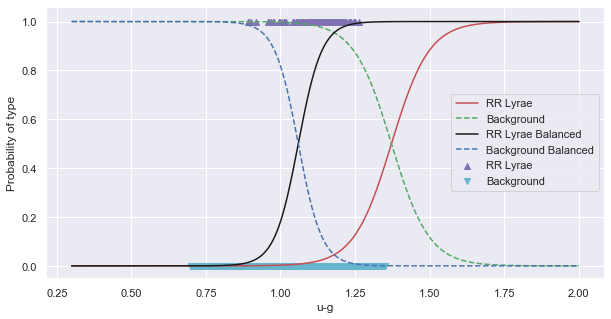

In [164]:
plot_scatter()
# YOUR CODE HERE
plt.plot(X_1d_new, y_1d_proba[:,1], 'r-', label = 'RR Lyrae')
plt.plot(X_1d_new, y_1d_proba[:,0], 'g--', label = 'Background')
plt.plot(X_1d_new, y_1d_proba_balanced[:,1], 'k-', label = 'RR Lyrae Balanced')
plt.plot(X_1d_new, y_1d_proba_balanced[:,0],'b--', label = 'Background Balanced')

plt.xlabel("u-g")
plt.ylabel("Probability of type")

plt.legend()
#raise NotImplementedError()

Comment on the decision boundary of the balanced model compared to the unbalanced models fitted previously.

The new balanced model has a slightly lower decision boundary compared to the model fitted previously. 

Now that we've built up good intuition surrounding the subtleties of the classification problem at hand in 1D, let's consider the 2D problem (we will keep to 2D for plotting convenience).

For the 2D case we consider the following colours.

In [114]:
ind = 1
cols[:ind+1]

['u-g', 'g-r']

Consider the following training and test data for the 2D problem.

In [115]:
X_train_2d = X_train[:, :ind+1]
X_train_2d = X_train_2d.reshape(-1,ind+1)
X_test_2d = X_test[:, :ind+1]
X_test_2d = X_test_2d.reshape(-1,ind+1)

Train a logistic regression model for this 2D problem.  Use variable `clf_2d_logistic` for your classifier.

In [159]:
# YOUR CODE HERE
clf_2d_logistic = LogisticRegression(C=C, class_weight='balanced')
clf_2d_logistic.fit(X_train_2d, y_train) 
#raise NotImplementedError()

C:\Users\mubarik\Anaconda3\envs\MLBDenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
check_var_defined('clf_2d_logistic')

clf_2d_logistic defined.


Compute the precision and recall of your 2D logistic regression model. Use variables `precision_logistic` and `recall_logistic` for your results.

In [160]:
# YOUR CODE HERE
from sklearn.metrics import precision_score, recall_score
precision_logistic = precision_score(y_train, clf_2d_logistic.predict(X_train_2d))
recall_logistic = recall_score(y_train, clf_2d_logistic.predict(X_train_2d))
#raise NotImplementedError()

In [119]:
check_var_defined('precision_logistic')
print("precision_logistic = {0:.6f}".format(precision_logistic))

precision_logistic defined.
precision_logistic = 0.141589


In [120]:
check_var_defined('recall_logistic')
print("recall_logistic = {0:.6f}".format(recall_logistic))

recall_logistic defined.
recall_logistic = 0.985955


Consider the following meshgrid defining the u-g and g-r colour domain of interest.

In [121]:
xlim = (0.7, 1.45)  # u-g
ylim = (-0.15, 0.4) # g-r
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))

Over the domain specified above plot the predicted classification probability.  Overlay on your plot the data instances, highlighting whether a RR Lyrae or background star, and the decision boundary.

(-0.15, 0.4)

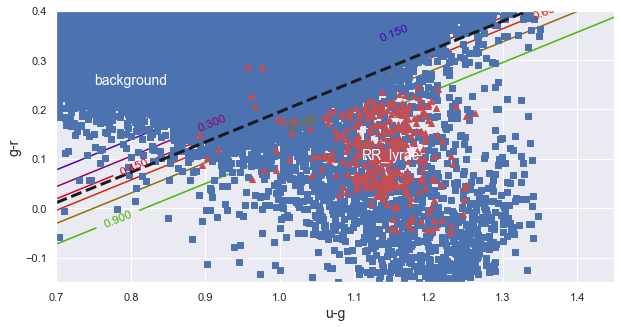

In [126]:
# YOUR CODE HERE
X_new = np.c_[xx.ravel(), yy.ravel()]
y_proba = clf_2d_logistic.predict_proba(X_new)

plt.figure(figsize=(10, 5))
plt.plot(X_train_2d[y_train==0, 0], X_train_2d[y_train==0, 1], "bs")
plt.plot(X_train_2d[y_train==1, 0], X_train_2d[y_train==1, 1], "r^")

zz = y_proba[:, 1].reshape(xx.shape)
contour = plt.contour(xx, yy, zz, cmap=plt.cm.brg)
left_right = np.array(xlim) 
boundary = -(clf_2d_logistic.coef_[0][0] * left_right + clf_2d_logistic.intercept_[0]) / clf_2d_logistic.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(0.8,0.25, "background", fontsize=14, color="w", ha="center")
plt.text(1.15,0.1, "RR_lyrae", fontsize=14, color="w", ha="center")
plt.xlabel("u-g", fontsize=14,)
plt.ylabel("g-r", fontsize=14,)
plt.xlim(xlim)
plt.ylim(ylim)
#raise NotImplementedError()

Now train an SVM classifier that can support a non-linear decision boundary on the same problem.

In [127]:
# YOUR CODE HERE
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

gamma = 0.5
C = 1000
rbf_kernel_svm_clf = Pipeline((("scaler", StandardScaler()), ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))))
# raise NotImplementedError()

Replicate for the SVM your plot above for the 2D logistic regression model.  Over the domain specified above plot the decision function score.  Overlay on your plot the data instances, highlighting whether a RR Lyrae or background star, and the decision boundary.

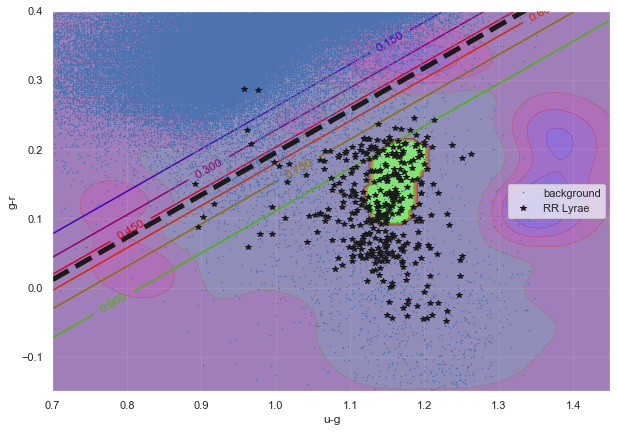

<Figure size 720x360 with 0 Axes>

In [144]:
# YOUR CODE HERE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.svm import SVC

polynomial_svm_clf = Pipeline((("scaler", StandardScaler()),("svm_clf", SVC(kernel = 'rbf', C=600, gamma =1.2))))
polynomial_svm_clf.fit(X_train_2d, y_train)


def plot_predictions(clf, axes, xx, yy, zz):
    
    y_pred = clf.predict(X_new).reshape(xx.shape)
    y_decision = clf.decision_function(X_new).reshape(xx.shape)
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.brg, alpha=0.4)
    plt.contourf(xx, yy, y_decision, cmap=plt.cm.brg, alpha=0.2)

    plt.figure(figsize=(10,5))
#below is the code that plots the data for Background and RR Lyrae
plt.figure(figsize=(10, 7))
plt.plot(X_train_2d[y_train==0, 0], X_train_2d[y_train==0, 1], "bs", markersize=0.5, label= 'background')
plt.plot(X_train_2d[y_train==1, 0], X_train_2d[y_train==1, 1], "k*", label = 'RR Lyrae')
zz = y_proba[:, 1].reshape(xx.shape)
contour = plt.contour(xx, yy, zz, cmap=plt.cm.brg)
left_right = np.array(xlim)
boundary = -(clf_2d_logistic.coef_[0][0] * left_right + clf_2d_logistic.intercept_[0]) / clf_2d_logistic.coef_[0][1]

plt.axis(xlim+ylim)
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=5)
plt.xlabel('u-g')
plt.ylabel('g-r')
plt.legend(loc='center right')
plot_predictions(polynomial_svm_clf, xlim+ylim, xx, yy, zz)
#raise NotImplementedError()

Compute the precision and recall of your 2D SVM model. Use variables `precision_svm` and `recall_svm` for your results.

In [135]:
# YOUR CODE HERE
y_pred_svm = polynomial_svm_clf.predict(X_test_2d)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
#raise NotImplementedError()

In [136]:
check_var_defined('precision_svm')
print("precision_svm = {0:.6f}".format(precision_svm))

precision_svm defined.
precision_svm = 0.586207


In [137]:
check_var_defined('recall_svm')
print("recall_svm = {0:.6f}".format(recall_svm))

recall_svm defined.
recall_svm = 0.267717


Comment on the difference in decision boundary between your logistic regression and SVM models and how this impacts the effectiveness of the models.

The Logistic Regression model plots a linear curve for a boundary that is non-linear. With that said, this method of classification is not ideal in regards to dealing with this type of data. The SVM model plots a non-linear boundary for the non-linear data set, thus making this a more appropriate boundary. Therefore the SVM is a more effective model.     